# Analyse af Bispecifikke Antistoffer for Behandling af DLBCL

I denne notebook vil vi udføre nogle analyser, der understøtter artiklen om bispecifikke antistoffer til behandling af DLBCL (Diffuse Large B-Cell Lymphoma). Vi vil se på forskellige måder, medicin kan administreres, og hvordan det påvirker deres niveauer i kroppen og risikoen for bivirkninger. Vi vil også undersøge, hvordan bestemte celler i tumoren kan påvirke behandlingsresultaterne.


## Trin 1: Installation af nødvendige biblioteker

Vi skal bruge nogle specielle Python-biblioteker til vores analyser. Hvis du ikke har dem installeret, kan du gøre det ved at køre nedenstående kommando.

In [1]:
!pip install numpy matplotlib seaborn pandas

## Trin 2: Import af nødvendige biblioteker

Vi importerer de nødvendige biblioteker, så vi kan bruge dem senere i vores analyser.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Trin 3: Subkutan versus intravenøs administration

Når medicin gives subkutant (under huden) eller intravenøst (direkte i blodåren), påvirker det, hvor hurtigt medicinen kommer ind i blodet og hvor længe den forbliver der. Vi vil simulere disse niveauer over tid for begge administrationsmetoder.


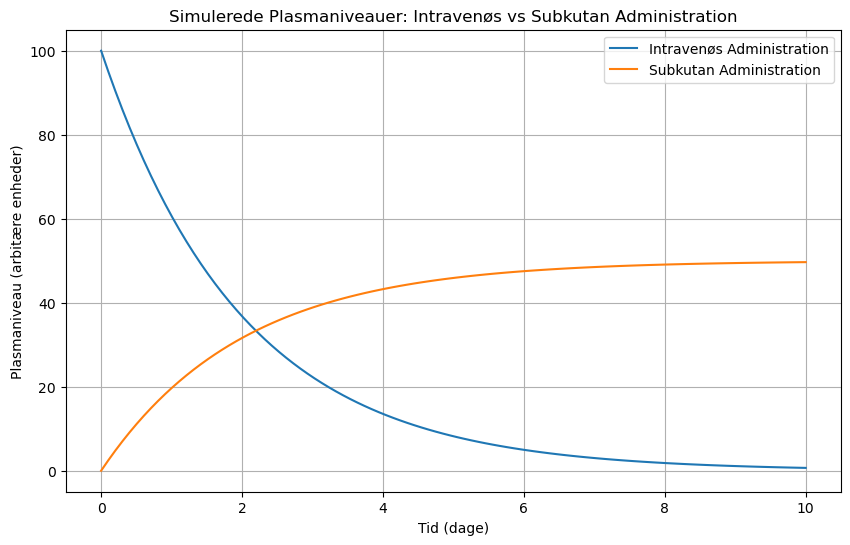

In [3]:
# Simuler tidspunkter (dage)
time = np.linspace(0, 10, 100)

# Simuler plasmaniveauer for intravenøs administration (hurtig stigning og fald)
iv_levels = 100 * np.exp(-0.5 * time)

# Simuler plasmaniveauer for subkutan administration (langsom stigning og fald)
sc_levels = 50 * (1 - np.exp(-0.5 * time))

plt.figure(figsize=(10, 6))
plt.plot(time, iv_levels, label='Intravenøs Administration')
plt.plot(time, sc_levels, label='Subkutan Administration')
plt.xlabel('Tid (dage)')
plt.ylabel('Plasmaniveau (arbitære enheder)')
plt.title('Simulerede Plasmaniveauer: Intravenøs vs Subkutan Administration')
plt.legend()
plt.grid(True)
plt.show()

I grafen ovenfor kan vi se, at intravenøs administration fører til en hurtig stigning og fald i plasmaniveauer af medicinen. Subkutan administration fører til en langsommere stigning og fald, hvilket kan mindske risikoen for alvorlige bivirkninger.

## Trin 4: Biomarkørstudier

Biomarkørstudier undersøger, hvordan bestemte biologiske indikatorer, som f.eks. T-celler i tumoren, påvirker behandlingsresultaterne. Vi vil generere hypotetiske data og analysere sammenhængen mellem T-celle niveauer i tumoren og chancen for komplet respons (CR) på behandlingen.


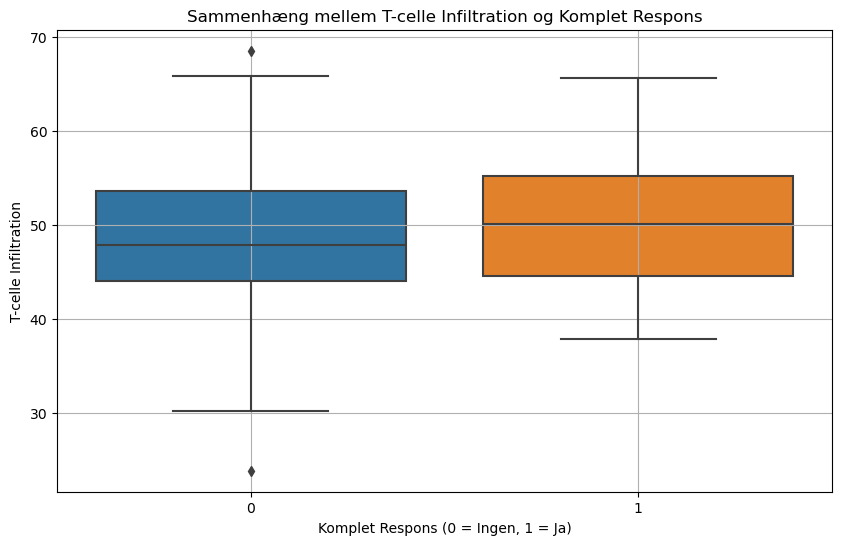

In [4]:
# Generer hypotetiske data
np.random.seed(42)
data = {
    'PatientID': range(1, 101),
    'T_cell_infiltration': np.random.normal(50, 10, 100),  # T-celle infiltration niveauer
    'Complete_Response': np.random.choice([0, 1], size=100, p=[0.7, 0.3])  # 0 = ingen CR, 1 = CR
}

df = pd.DataFrame(data)

# Visualiser sammenhængen mellem T-celle infiltration og komplet respons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complete_Response', y='T_cell_infiltration', data=df)
plt.xlabel('Komplet Respons (0 = Ingen, 1 = Ja)')
plt.ylabel('T-celle Infiltration')
plt.title('Sammenhæng mellem T-celle Infiltration og Komplet Respons')
plt.grid(True)
plt.show()

I grafen ovenfor ser vi, at patienter med højere niveauer af T-celle infiltration i deres tumorer har større sandsynlighed for at opnå komplet respons (CR) på behandlingen. Dette betyder, at T-celler spiller en vigtig rolle i bekæmpelsen af kræftceller.

## Trin 5: Effekt og sikkerhed

Vi vil nu simulere behandlingsresultater og bivirkninger for en gruppe patienter, der modtager forskellige typer af bispecifikke antistoffer.


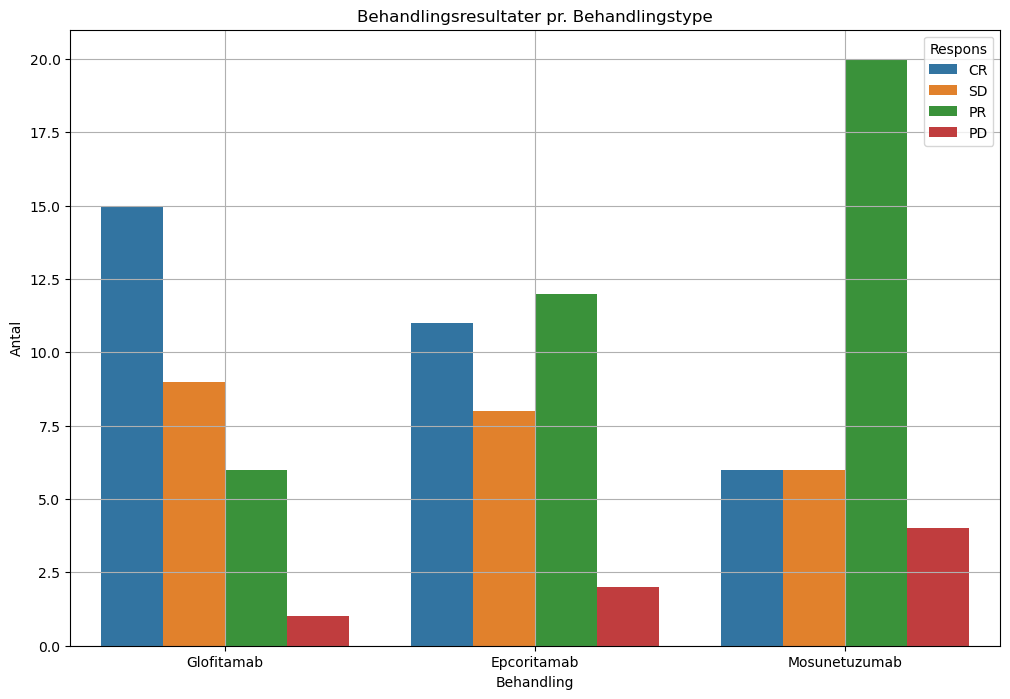

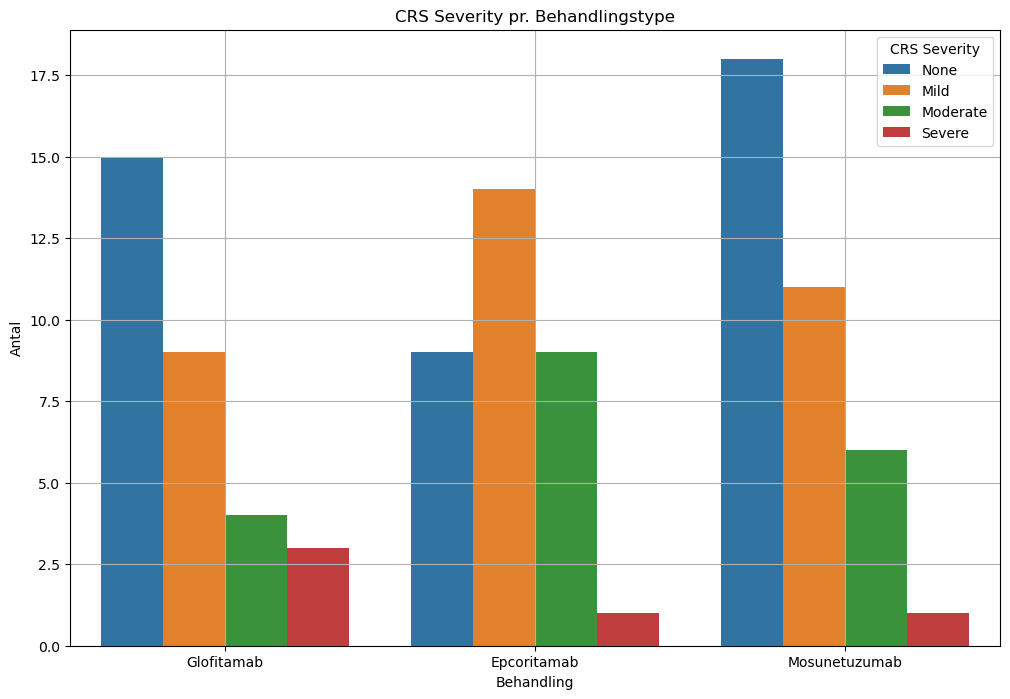

In [5]:
# Generer hypotetiske data for behandlingsresultater
np.random.seed(42)
treatments = ['Epcoritamab', 'Mosunetuzumab', 'Glofitamab']
data = {
    'PatientID': range(1, 101),
    'Treatment': np.random.choice(treatments, 100),
    'Response': np.random.choice(['CR', 'PR', 'SD', 'PD'], 100, p=[0.3, 0.4, 0.2, 0.1]),  # CR = Complete Response, PR = Partial Response, SD = Stable Disease, PD = Progressive Disease
    'CRS_Severity': np.random.choice(['None', 'Mild', 'Moderate', 'Severe'], 100, p=[0.5, 0.3, 0.15, 0.05])
}

df_treatment = pd.DataFrame(data)

# Visualiser behandlingsresultater og CRS-severitet
plt.figure(figsize=(12, 8))
sns.countplot(x='Treatment', hue='Response', data=df_treatment)
plt.xlabel('Behandling')
plt.ylabel('Antal')
plt.title('Behandlingsresultater pr. Behandlingstype')
plt.legend(title='Respons')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Treatment', hue='CRS_Severity', data=df_treatment)
plt.xlabel('Behandling')
plt.ylabel('Antal')
plt.title('CRS Severity pr. Behandlingstype')
plt.legend(title='CRS Severity')
plt.grid(True)
plt.show()

I de to grafer ovenfor kan vi se fordelingen af behandlingsresultater (komplet respons, delvis respons, stabil sygdom, progressiv sygdom) og sværhedsgraden af CRS (ingen, mild, moderat, alvorlig) for forskellige typer bispecifikke antistoffer. Disse visualiseringer kan hjælpe os med at forstå, hvordan forskellige behandlinger påvirker patienter på forskellige måder.